In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
# from collections import Counter
# from sklearn.linear_model import LogisticRegression
from statistics import *
# from sklearn import metrics
import feather
import seaborn as sns
from collections import Counter
# from sklearn.model_selection import train_test_split
# from sklearn.manifold import TSNE
# import matplotlib.patches as mpatches
# import time
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import PCA
# from sklearn.decomposition import PCA, TruncatedSVD
# from scipy.cluster import hierarchy as hc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score,classification_report,confusion_matrix
# from imblearn.over_sampling import RandomOverSampler,SMOTE
# from sklearn.datasets import make_classification
# from sklearn.ensemble import *
# #Additional scklearn functions
# from sklearn.model_selection import GridSearchCV   #Print pd.merge(df1, df2, on='Customer_id', how='inner')
# from imblearn.ensemble import *

Here We create Features on this using RFM and joining the tables with UserID

In [ ]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [4]:
df = pd.read_csv("D:/Kaggle/WNS/train.csv",low_memory=False,parse_dates=['impression_time'])
df_logs = pd.read_csv("D:/Kaggle/WNS/view_log.csv",low_memory=False,parse_dates=['server_time'])
df_item = pd.read_csv("D:/Kaggle/WNS/item_data.csv",low_memory=False)

In [3]:
df.shape

(237609, 7)

In [7]:
df_logs.shape,df_item.shape,df_logs_item.shape

((3118622, 5), (132761, 6), (3116840, 10))

Joining the tables

In [4]:
df_logs_item = pd.merge(df_logs,df_item,how='inner',on='item_id')

In [9]:
df_logs_item.head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-10-15 08:58:00,android,112333,4557,32970,54685,16,56,253,3184
1,2018-10-15 09:36:00,android,783457,88320,32970,54685,16,56,253,3184
2,2018-10-15 10:59:00,android,6902,1711,32970,54685,16,56,253,3184
3,2018-10-15 11:31:00,android,61138,58906,32970,54685,16,56,253,3184
4,2018-10-15 12:03:00,android,441653,64221,32970,54685,16,56,253,3184


In [5]:
print(df['impression_time'].min(),df['impression_time'].max())

2018-11-15 00:00:00 2018-12-13 07:43:00


RFM Analysis Widely used by many Companies

In [53]:
import datetime as dt
sd = dt.datetime(2018,12,14)
df['hist_imp']=sd - df['impression_time']
df['hist_imp'].astype('timedelta64[D]')
df['hist_imp']=df['hist_imp'] / np.timedelta64(1, 'D')
df.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,hist_imp
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,29.000000
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,28.999306
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,28.998611
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,28.998611
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,28.998611


In [54]:
rfmTable = df.groupby('user_id').agg({'hist_imp': lambda x:x.min(), # Recency
                                        'user_id': lambda x: len(x)})          # Monetary Value

rfmTable.rename(columns={'hist_imp': 'recency_imp', 
                         'user_id': 'frequency_imp'}, inplace=True)

In [55]:
rfmTable

,recency_imp,frequency_imp
user_id,,
0,17.020833,1
2,22.092361,4
3,8.091667,1
5,9.222917,2
6,13.017361,1
8,7.405556,1
9,8.584028,4
10,28.525000,2
11,16.206944,1


In [56]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      recency_imp  frequency_imp
0.25     6.052778            1.0
0.50    11.065278            2.0
0.75    18.315278            3.0 <class 'pandas.core.frame.DataFrame'>


In [57]:
quartiles=quartiles.to_dict()
quartiles

{'recency_imp': {0.25: 6.052777777777778,
  0.5: 11.065277777777778,
  0.75: 18.315277777777776},
 'frequency_imp': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0}}

In [58]:
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1   

In [59]:
rfmSeg = rfmTable
rfmSeg['R_Quartile_imp'] = rfmSeg['recency_imp'].apply(RClass, args=('recency_imp',quartiles,))
rfmSeg['F_Quartile_imp'] = rfmSeg['frequency_imp'].apply(FMClass, args=('frequency_imp',quartiles,))

In [61]:
rfmSeg['RFMClass_imp'] = rfmSeg.R_Quartile_imp.map(str) \
                            + rfmSeg.F_Quartile_imp.map(str) \

In [62]:
rfmSeg['Total_Score_imp'] = rfmSeg['R_Quartile_imp'] + rfmSeg['F_Quartile_imp']
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74723 entries, 0 to 92586
Data columns (total 6 columns):
recency_imp        74723 non-null float64
frequency_imp      74723 non-null int64
R_Quartile_imp     74723 non-null int64
F_Quartile_imp     74723 non-null int64
RFMClass_imp       74723 non-null object
Total_Score_imp    74723 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 4.0+ MB
         recency_imp  frequency_imp  R_Quartile_imp  F_Quartile_imp  \
user_id                                                               
0          17.020833              1               3               4   
2          22.092361              4               4               1   
3           8.091667              1               2               4   
5           9.222917              2               2               3   
6          13.017361              1               3               4   

        RFMClass_imp  Total_Score_imp  
user_id                                
0        

In [63]:
RFM = rfmSeg.reset_index()

In [64]:
RFM

,user_id,recency_imp,frequency_imp,R_Quartile_imp,F_Quartile_imp,RFMClass_imp,Total_Score_imp
0,0,17.020833,1,3,4,34,7
1,2,22.092361,4,4,1,41,5
2,3,8.091667,1,2,4,24,6
3,5,9.222917,2,2,3,23,5
4,6,13.017361,1,3,4,34,7
5,8,7.405556,1,2,4,24,6
6,9,8.584028,4,2,1,21,3
7,10,28.525000,2,4,3,43,7
8,11,16.206944,1,3,4,34,7
9,12,27.829167,1,4,4,44,8


In [65]:
df.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,hist_imp
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,29.000000
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,28.999306
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,28.998611
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,28.998611
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,28.998611


In [66]:
RFM.to_feather('tmp/RFM_imp')

In [68]:
df_imp = pd.merge(df,RFM,how='left',on='user_id')

Some EDA tells us RFM is sucessfull and has a very good Pattern with the target variable

Text(0.5, 0, 'no of impressions from date')

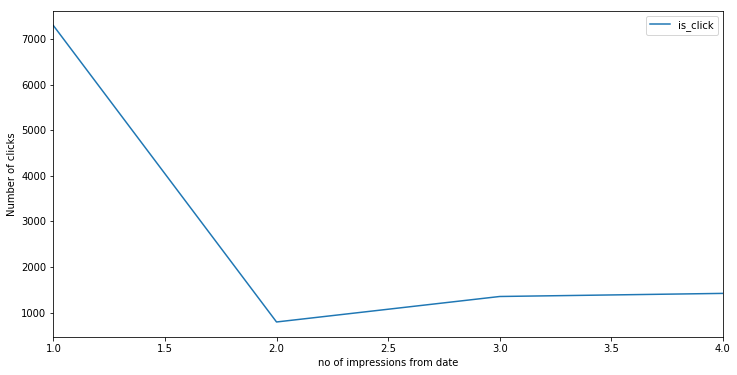

In [69]:
df_imp.groupby('F_Quartile_imp').agg({'is_click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.xlabel('no of impressions from date')

In [70]:
df_imp

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,hist_imp,recency_imp,frequency_imp,R_Quartile_imp,F_Quartile_imp,RFMClass_imp,Total_Score_imp
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,29.000000,27.271528,3,4,2,42,6
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,28.999306,1.996528,52,1,1,11,2
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,28.998611,1.619444,9,1,1,11,2
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,28.998611,21.902083,4,4,1,41,5
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,28.998611,18.050694,16,3,1,31,4
5,3416a75f4cea9109507cacd8e2f2aefc,2018-11-15 00:03:00,67352,409,latest,1,0,28.997917,1.579167,24,1,1,11,2
6,f457c545a9ded88f18ecee47145a72c0,2018-11-15 00:03:00,64356,190,intermediate,0,0,28.997917,4.490972,22,1,1,11,2
7,72b32a1f754ba1c09b3695e0cb6cde7f,2018-11-15 00:04:00,27329,481,latest,0,0,28.997222,1.045833,10,1,1,11,2
8,fc490ca45c00b1249bbe3554a4fdf6fb,2018-11-15 00:05:00,83318,386,old,0,0,28.996528,28.996528,1,4,4,44,8
9,d2ddea18f00665ce8623e36bd4e3c7c5,2018-11-15 00:05:00,70206,190,latest,0,0,28.996528,3.175000,14,1,1,11,2


In [5]:
df_logs_item.head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-10-15 08:58:00,android,112333,4557,32970,54685,16,56,253,3184
1,2018-10-15 09:36:00,android,783457,88320,32970,54685,16,56,253,3184
2,2018-10-15 10:59:00,android,6902,1711,32970,54685,16,56,253,3184
3,2018-10-15 11:31:00,android,61138,58906,32970,54685,16,56,253,3184
4,2018-10-15 12:03:00,android,441653,64221,32970,54685,16,56,253,3184


In [214]:
df.user_id.value_counts()

71457    73
29947    70
59007    70
52082    67
68540    64
85051    63
65724    62
20823    60
3742     59
72494    59
89052    59
28222    58
91579    58
57028    58
71247    57
51168    57
43759    57
8667     57
450      57
21190    57
83534    56
66334    56
42126    55
52485    55
46714    55
29336    54
54552    54
41219    54
60522    54
48538    54
         ..
581       1
2628      1
10816     1
84460     1
70119     1
72166     1
68068     1
62043     1
55902     1
68196     1
35540     1
72422     1
78563     1
53983     1
56030     1
62171     1
58073     1
37591     1
39638     1
47826     1
66149     1
43728     1
25289     1
27336     1
6854      1
2756      1
8897      1
10944     1
82541     1
0         1
Name: user_id, Length: 74723, dtype: int64

In [5]:
df.shape,df_logs.shape,df_item.shape

((237609, 7), (3118622, 5), (132761, 6))

In [220]:
df.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [48]:
numerical_features = df_item.select_dtypes(include=np.number)
categorical_features = df_item.select_dtypes(include=np.object)
print("numeric_features: ", numerical_features.shape, numerical_features.columns)
print("categorical_features: ", categorical_features.shape, categorical_features.columns)

numeric_features:  (132761, 6) Index(['item_id', 'item_price', 'category_1', 'category_2', 'category_3',
       'product_type'],
      dtype='object')
categorical_features:  (132761, 0) Index([], dtype='object')


In [51]:
numerical_features.drop('item_id',axis=1,inplace=True)

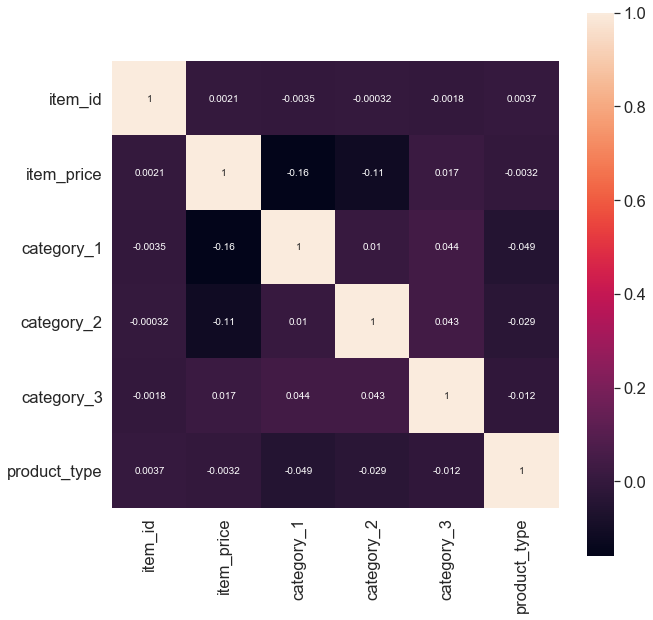

In [186]:
fig = plt.subplots(figsize= (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df_item.corr(),square=True,cbar=True,annot=True,annot_kws={'size':10})
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = sns.countplot(x='item_price', hue='item_price', data=dataframe)
ax.set_title('Loan date')

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9,ax1) = plt.subplots(nrows=2, ncols=2, figsize=(14,20))
AX = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i,j in zip([i for i in numerical_features.columns.to_list()[1:] if len(i) >3],AX):
    sns.boxplot(x = 'item_price', y = i, data =numerical_features,ax=j)

In [6]:
add_datepart(df,'impression_time')

In [7]:
add_datepart(df_logs,'server_time')

In [40]:
df_logs.user_id.value_counts()

72172    2906
72666    1182
15505    1134
80432    1132
24694    1089
70194    1032
66654    1025
80227     991
3411      969
53899     942
20465     938
85366     919
51627     909
25617     906
27075     889
2507      864
16292     864
54923     838
62337     827
15497     819
52352     812
88446     802
32581     786
29941     786
90750     771
32105     771
89337     754
4015      751
66239     736
21938     725
         ... 
76173       1
73555       1
2470        1
81751       1
84366       1
30000       1
37300       1
40803       1
44585       1
60704       1
12717       1
86400       1
4521        1
8045        1
78221       1
67978       1
82307       1
38446       1
1902        1
30002       1
11577       1
3389        1
5438        1
29092       1
20896       1
53111       1
87319       1
77080       1
75033       1
62183       1
Name: user_id, Length: 89157, dtype: int64

In [28]:
df_logs.item_id.value_counts()

425       14821
72955     12930
33633     12711
64835     12008
118262    11816
127900    11102
84704      9182
76404      8838
119516     8761
95249      8745
104035     8490
79527      8387
54546      8337
3500       7638
30048      7542
44686      7540
89373      7431
73972      7198
13552      7181
45690      7104
15757      7033
68968      6999
71406      6982
91322      6705
76156      6657
2121       6459
79225      6448
10379      6422
72120      6338
1528       6315
          ...  
50248         1
52297         1
58444         1
60493         1
64591         1
17496         1
29790         1
31839         1
99424         1
109669        1
111737        1
115831        1
64592         1
117878        1
62545         1
56404         1
50263         1
46169         1
37981         1
33887         1
97376         1
87141         1
83047         1
81000         1
76906         1
72812         1
70765         1
68718         1
128113        1
35823         1
Name: item_id, Length: 1

In [14]:
df_item.item_id.value_counts()

2047      1
87424     1
19747     1
29988     1
32037     1
25894     1
27943     1
5416      1
7465      1
1322      1
3371      1
13612     1
15661     1
9518      1
11567     1
54576     1
56625     1
50482     1
52531     1
62772     1
64821     1
58678     1
60727     1
38200     1
40249     1
34106     1
36155     1
46396     1
48445     1
42302     1
         ..
58057     1
82557     1
88702     1
86655     1
131733    1
43712     1
41665     1
47810     1
45763     1
35524     1
33477     1
39622     1
37575     1
60104     1
64202     1
27352     1
62155     1
51916     1
49869     1
56014     1
53967     1
10960     1
8913      1
15058     1
13011     1
2772      1
725       1
6870      1
4823      1
0         1
Name: item_id, Length: 132761, dtype: int64

In [ ]:
numerical_features = df.select_dtypes(include=np.number)
categorical_features = df.select_dtypes(include=np.object)
print("numeric_features: ", numerical_features.shape, numerical_features.columns)
print("categorical_features: ", categorical_features.shape, categorical_features.columns)

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(16, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i,j in zip([i for i in numerical_features.columns.to_list()[1:] if len(i) >3],range(10)):
    axs[j].hist(numerical_features[i])
    axs[j].set_title(i+': '+str(np.round(numerical_features[i].skew(),2)))

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9,ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(14,20))
AX = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i,j in zip([i for i in numerical_features.columns.to_list()[1:] if len(i) >3],AX):
    sns.boxplot(x = 'is_click', y = i, data =numerical_features,ax=j)

In [58]:
df_logs.head()

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [180]:
df_logs.loc[df_logs['user_id']==66654]

,server_time,device_type,session_id,user_id,item_id
158071,2018-10-18 11:41:00,android,916407,66654,113905
158155,2018-10-18 11:43:00,android,916407,66654,57159
158164,2018-10-18 11:43:00,android,916407,66654,113905
158220,2018-10-18 11:45:00,android,916407,66654,57159
158238,2018-10-18 11:45:00,android,916407,66654,113905
158497,2018-10-18 11:53:00,android,916407,66654,57159
158501,2018-10-18 11:53:00,android,916407,66654,113905
158562,2018-10-18 11:54:00,android,916407,66654,113905
158591,2018-10-18 11:55:00,android,916407,66654,57159
158610,2018-10-18 11:56:00,android,916407,66654,113905


In [83]:
df_servertime = pd.DataFrame(df_servertime).reset_index()


In [179]:
df_servertime.loc[df_servertime['user_id']==66654]

In [193]:
df_recent.to_feather("tmp/wns_time")

In [183]:
print(data[])

{'item_id': 871321    62896
Name: item_id, dtype: int64, 'server_accessed_last':                 server_time device_type  session_id  user_id  item_id
5412    2018-10-15 11:21:00     android      173275    72172    95102
5467    2018-10-15 11:23:00     android      173275    72172    31772
5970    2018-10-15 11:38:00     android      173275    72172    13751
6121    2018-10-15 11:43:00     android      173275    72172    56690
6241    2018-10-15 11:47:00     android      173275    72172   122783
6328    2018-10-15 11:50:00     android      173275    72172    37580
6476    2018-10-15 11:54:00     android      173275    72172    75582
7988    2018-10-15 12:41:00     android      120606    72172    33786
8032    2018-10-15 12:43:00     android      120606    72172    86369
8116    2018-10-15 12:45:00     android      120606    72172   113800
8351    2018-10-15 12:53:00     android      120606    72172    44465
8420    2018-10-15 12:55:00     android      120606    72172    33004
8424    2

In [175]:
df_new_log = pd.DataFrame(data=df_new_logs)
df_new_items = pd.DataFrame(data=df_new_items)

In [117]:
df_new_log = feather.read_dataframe("tmp/wns_log")

In [142]:
df_item.isnull().values.any()

False

In [175]:
df_new_items = pd.DataFrame(data=df_new_items)

(85883, 5)

In [159]:
display_all(df_new_log)

,device_type,freq_items_checked,server_accessed,unique_items_checked,user_id
0,android,1,1,1,62183
1,android,1,1,1,62183
2,android,1,1,1,62183
3,android,1,1,1,62183
4,android,1,1,1,62183
5,android,1,1,1,62183
6,android,1,1,1,62183
7,android,1,1,1,62183
8,android,1,1,1,62183
9,android,1,1,1,62183


In [179]:
# df_new_log.to_feather('tmp\wns_log')
df_new_items.to_feather('tmp\wns_item')

In [178]:
df_new_log

,device_type,server_accessed,unique_items_checked,user_id
0,android,2906,690,72172
1,android,1182,390,72666
2,android,1134,463,15505
3,android,1132,346,80432
4,android,1089,581,24694
5,android,1032,605,70194
6,android,1025,19,66654
7,android,991,144,80227
8,android,969,564,3411
9,android,942,414,53899


In [73]:
df_servertime['device_type'] = 

72172    2906
72666    1182
15505    1134
80432    1132
24694    1089
Name: user_id, dtype: int64

In [75]:
df_logs.loc[df_logs['user_id']==72172]

,server_time,device_type,session_id,user_id,item_id
5412,2018-10-15 11:21:00,android,173275,72172,95102
5467,2018-10-15 11:23:00,android,173275,72172,31772
5970,2018-10-15 11:38:00,android,173275,72172,13751
6121,2018-10-15 11:43:00,android,173275,72172,56690
6241,2018-10-15 11:47:00,android,173275,72172,122783
6328,2018-10-15 11:50:00,android,173275,72172,37580
6476,2018-10-15 11:54:00,android,173275,72172,75582
7988,2018-10-15 12:41:00,android,120606,72172,33786
8032,2018-10-15 12:43:00,android,120606,72172,86369
8116,2018-10-15 12:45:00,android,120606,72172,113800


In [65]:
min(df_u['server_time'])

Timestamp('2018-10-15 11:21:00')

In [205]:
max(df_item.item_price.values)

1340800

In [206]:
df_item.product_type.value_counts()

2874     4261
5622     1417
5036     1262
10412     990
7791      980
5164      853
2106      823
7455      767
5609      712
9959      632
5276      630
3184      588
9015      541
8310      540
2417      526
3055      511
9041      505
6239      471
4524      463
3399      461
6648      455
4924      448
8121      426
6077      391
4986      381
9362      366
6186      362
1945      358
1943      358
5251      358
         ... 
9204        1
1839        1
3886        1
1711        1
7475        1
3505        1
5554        1
8564        1
10037       1
3694        1
7858        1
9963        1
3760        1
7474        1
5997        1
7218        1
6125        1
7090        1
4078        1
9013        1
2031        1
8885        1
4210        1
10548       1
6259        1
8308        1
6194        1
7859        1
6515        1
960         1
Name: product_type, Length: 7959, dtype: int64

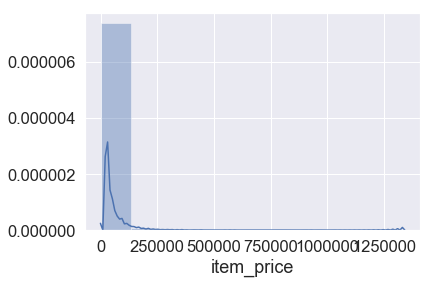

In [199]:
sns.distplot(x,bins=10);

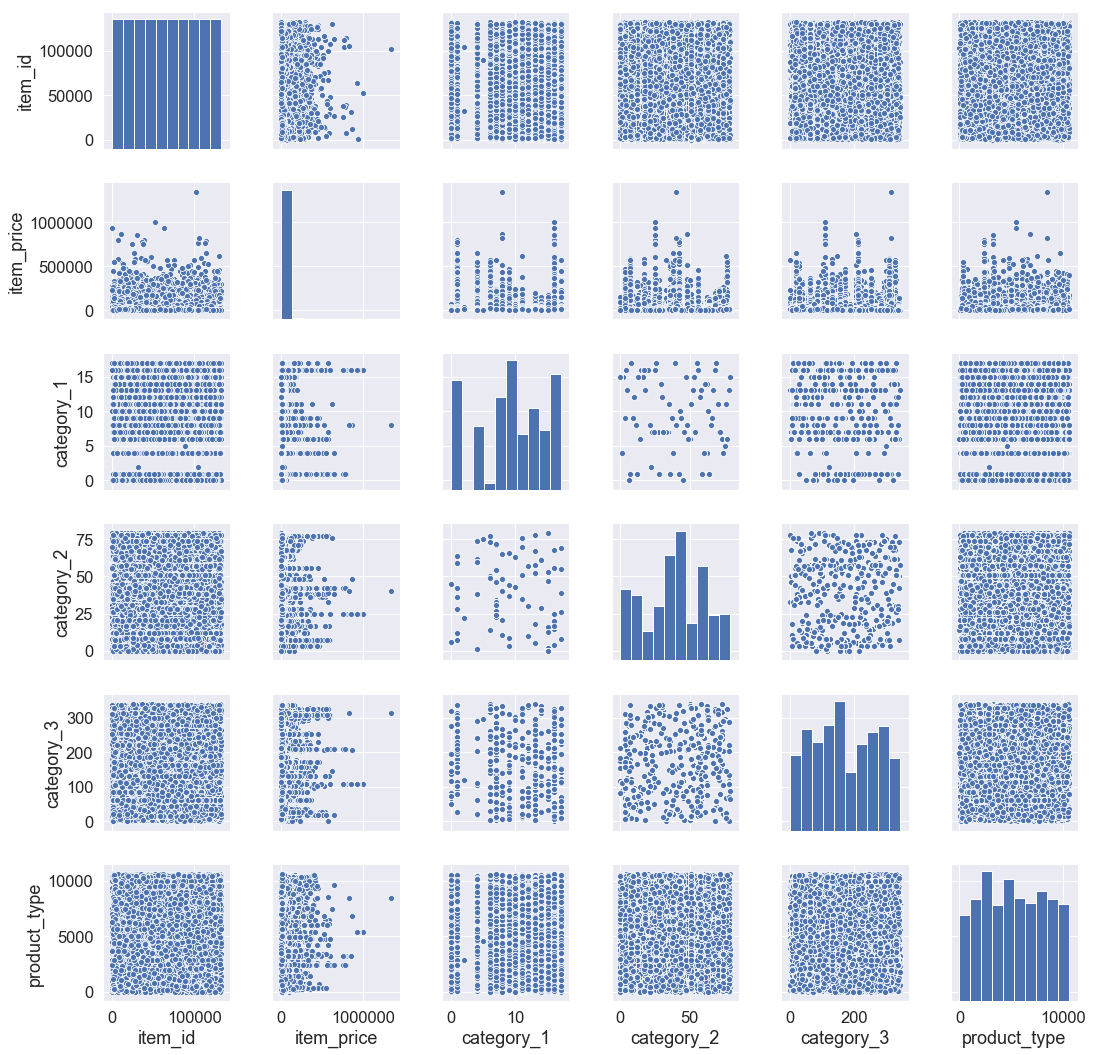

In [200]:
sns.pairplot(df_item);

In [195]:
df_raw = pd.merge(df,df_new_log,how='inner',on='user_id')

In [196]:
df_raw

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,device_type,server_accessed,unique_items_checked
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,android,1,1
1,621bf66ddb7c962aa0d22ac97d69b793,2018-11-15 00:19:00,87862,422,old,0,0,android,1,1
2,ab394288aed46588bdc90bf4b541ec0d,2018-11-16 17:29:00,87862,422,old,0,0,android,1,1
3,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,android,12,7
4,6b18886bc278247582704943f5c66eb9,2018-11-16 16:31:00,63410,467,latest,1,0,android,12,7
5,cbd7fb1bba4de3486f76147a75f3ec89,2018-11-16 18:14:00,63410,467,latest,1,0,android,12,7
6,0b6cf75f58aca50278bdcfc9c46576f4,2018-11-18 08:09:00,63410,467,latest,1,0,android,12,7
7,9fd93cfddc3568482b5eb057efe06f16,2018-11-17 01:54:00,63410,467,latest,1,0,android,12,7
8,5c7368d5679563a902701bf8b46575fc,2018-11-18 07:48:00,63410,283,latest,1,0,android,12,7
9,c86027cb65669a6bec290bd22c969f2d,2018-11-19 02:04:00,63410,467,latest,1,0,android,12,7


In [197]:
df_raw.drop('impression_id',axis=1,inplace=True)

In [198]:
train_cats(df_raw)

In [199]:
df_raw.os_version = df_raw.os_version.cat.codes

In [200]:
df_raw.device_type = df_raw.device_type.cat.codes

In [201]:
add_datepart(df_raw,'impression_time')

In [202]:
df_raw.drop('user_id',axis=1,inplace=True)

In [203]:
df_raw,y,nas = proc_df(df_raw,'is_click')

creating a naive model to check predictions

In [205]:
m = RandomForestClassifier(n_estimators=100,max_features='auto')
m.fit(df_raw,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [207]:
fi = rf_feat_importance(m,df_raw);fi[:10]

,cols,imp
18,impression_timeElapsed,0.379188
4,server_accessed,0.183914
0,app_code,0.172202
5,unique_items_checked,0.163245
1,os_version,0.023894
2,is_4G,0.019317
11,impression_timeDayofyear,0.018020
9,impression_timeDay,0.017921
10,impression_timeDayofweek,0.015925
8,impression_timeWeek,0.004229


In [206]:
print(classification_report(y,m.predict(df_raw)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226747
           1       1.00      0.98      0.99     10862

    accuracy                           1.00    237609
   macro avg       1.00      0.99      1.00    237609
weighted avg       1.00      1.00      1.00    237609



In [246]:
df_test = pd.read_csv("D:/Kaggle/WNS/test.csv",low_memory=False,parse_dates=['impression_time'])

In [237]:
df_test.drop('impression_id',axis=1,inplace=True)

In [238]:
df_test1 = pd.merge(df_test,df_new_log,how='inner',on='user_id')

In [239]:
df_test1.head()

,impression_time,user_id,app_code,os_version,is_4G,device_type,server_accessed,unique_items_checked
0,2018-12-13 07:44:00,44754,127,latest,1,android,1,1
1,2018-12-14 00:02:00,44754,127,latest,0,android,1,1
2,2018-12-12 17:51:00,44754,127,latest,1,android,1,1
3,2018-12-12 21:30:00,44754,127,latest,1,android,1,1
4,2018-12-15 19:25:00,44754,127,latest,1,android,1,1


In [241]:
train_cats(df_test1)

In [242]:
df_test1.os_version = df_test1.os_version.cat.codes
df_test1.device_type=df_test1.device_type.cat.codes

In [243]:
add_datepart(df_test1,'impression_time')

In [245]:
df_test1.drop('user_id',axis=1,inplace=True)

KeyError: "['user_id'] not found in axis"

In [247]:
y_test = m.predict(df_test1)
dic = {'is_click':y_test}
df_sub = pd.DataFrame(data=dic)


In [248]:
df_sub = pd.concat([df_test["impression_id"],df_sub],axis=1)

In [249]:
df_sub.is_click.value_counts()

0    90346
1      329
Name: is_click, dtype: int64

In [250]:
df_sub.to_csv("D:/Kaggle/WNS/sub_test.csv",index=False)